In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from pyod.models.iforest import IForest
from pyod.utils.utility import standardizer
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import joblib

In [2]:
benign=pd.read_csv('E:/Downloads/csv/csv/train/DataCICIoMT_2.csv')
benign= benign.sample(frac=0.9858248759936077, random_state=42)
len(benign)

190000

In [3]:
benign['ataque']='benign'
benign.shape

(190000, 46)

In [4]:
ataques=["ARP_Spoofing","MQTT-DDoS-Connect_Flood","MQTT-DDoS-Publish_Flood","MQTT-DoS-Connect_Flood",
        "MQTT-DoS-Publish_Flood","Malformed_Data","OS_Scan","Ping_Sweep","Port_Scan",             
        "VulScan","TCP_IP-DDoS-ICMP","TCP_IP-DDoS-SYN","TCP_IP-DDoS-TCP","TCP_IP-DDoS-UDP",
         "TCP_IP-DoS-ICMP","TCP_IP-DoS-SYN","TCP_IP-DoS-TCP","TCP_IP-DoS-UDP"
]

import pandas as pd
import os

# Ruta de la carpeta con los archivos .csv
carpeta = 'E:/Downloads/csv/csv/train/'

# Lista de números de archivos que deseas leer
numeros_archivos = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 24, 28, 36, 40, 44, 48]

# Lista para almacenar los DataFrames
dfs = []

c=0
# Leer y procesar cada archivo
for numero in numeros_archivos:
    path = os.path.join(carpeta, f'DataCICIoMT_{numero}.csv')
    df = pd.read_csv(path)
    
    # Tomar el 50% de los registros
    df_sampled = df.sample(frac=0.0061204155027677, random_state=42)
    
    df_sampled['ataque']=ataques[c]
    
    df_sampled1=pd.DataFrame(df_sampled)
    # Agregar al listado de DataFrames
    dfs.append(df_sampled1)
    
    c=c+1

# Concatenar todos los DataFrames en uno solo
df_resultante = pd.concat(dfs).reset_index(drop=True)

# Verificar el resultado
print(df_resultante.head())


   Header_Length  Protocol Type  Duration        Rate       Srate  Drate  \
0      2417518.2           17.0      64.0  180.874345  180.874345    0.0   
1      4808024.0            6.0      64.0  122.463303  122.463303    0.0   
2         1981.4            1.8      19.2    0.137061    0.137061    0.0   
3       756448.6           17.0      64.0  183.659356  183.659356    0.0   
4       332637.4            7.1      64.0  903.259143  903.259143    0.0   

   fin_flag_number  syn_flag_number  rst_flag_number  psh_flag_number  ...  \
0              0.0              0.0              0.0              0.0  ...   
1              0.0              0.0              0.0              0.0  ...   
2              0.0              0.0              0.0              0.2  ...   
3              0.0              0.0              0.0              0.0  ...   
4              0.0              0.0              0.0              0.1  ...   

          Std  Tot size           IAT  Number   Magnitue      Radius  \
0 

In [6]:
len(df_resultante)

10000

In [8]:
dataBalanceada = pd.concat([benign,df_resultante]).reset_index(drop=True)

In [8]:
dataBalanceada.to_csv('dataBalanceada5%.csv',index=False)

In [9]:
dataBalanceada['ataque'].value_counts()

ataque
benign                     190000
TCP_IP-DDoS-UDP              1262
TCP_IP-DDoS-TCP              1238
TCP_IP-DDoS-SYN              1220
TCP_IP-DDoS-ICMP             1193
MQTT-DDoS-Connect_Flood      1059
TCP_IP-DoS-UDP                839
TCP_IP-DoS-SYN                682
TCP_IP-DoS-ICMP               640
TCP_IP-DoS-TCP                584
Port_Scan                     514
MQTT-DoS-Publish_Flood        272
MQTT-DDoS-Publish_Flood       169
OS_Scan                       103
ARP_Spoofing                   98
MQTT-DoS-Connect_Flood         78
Malformed_Data                 31
VulScan                        13
Ping_Sweep                      5
Name: count, dtype: int64

In [10]:
# In[4]:
print('#### Mezclar la base de datos###############')
#Mezclar la base de datos
dataBalanceada = dataBalanceada.sample(frac=1).reset_index(drop=True)
dataBalanceada.head(-10)

#### Mezclar la base de datos###############


,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,ataque
0,97830.4,6.0,64.0,0.426862,0.426862,0.0,0.0,0.0,0.0,0.5,...,43.306865,75.6,1.694652e+08,13.5,13.257549,61.385397,1896.261676,1.0,244.6,benign
1,47190.2,6.0,64.0,0.214227,0.214227,0.0,0.0,0.0,0.0,0.9,...,215.387814,67.8,1.694626e+08,13.5,16.619358,305.246210,46904.299194,1.0,244.6,benign
2,103181.2,6.0,64.0,0.486633,0.486633,0.0,0.0,0.0,0.0,0.3,...,15.663694,74.3,4.135799e-03,5.5,12.832614,22.151808,273.696002,0.9,38.5,benign
3,292505.8,4.8,51.2,1.741183,1.741183,0.0,0.0,0.0,0.0,0.4,...,211.654781,69.0,1.694673e+08,13.5,16.456592,299.896441,45285.110027,1.0,244.6,benign
4,486291.1,6.0,64.0,2.033657,2.033657,0.0,0.0,0.0,0.0,0.5,...,10.223690,80.6,1.209021e-04,5.5,12.229315,14.458481,124.725884,0.9,38.5,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199985,47822.4,6.0,64.0,0.528833,0.528833,0.0,0.0,0.0,0.0,1.0,...,10.741926,88.0,1.694692e+08,13.5,13.292253,14.945792,112.115150,1.0,244.6,benign
199986,95590.6,5.4,57.6,2.036567,2.036567,0.0,0.0,0.0,0.0,0.4,...,212.772535,76.2,1.694675e+08,13.5,17.707267,301.424851,45719.667527,1.0,244.6,benign
199987,58826.3,6.0,64.0,1.053628,1.053628,0.0,0.0,0.0,0.0,0.5,...,12.317764,75.4,1.694650e+08,13.5,12.332618,17.393049,151.587023,1.0,244.6,benign
199988,250405.0,6.0,70.4,1.429431,1.429431,0.0,0.0,0.0,0.0,0.5,...,16.366747,80.0,9.998660e-02,5.5,12.149938,23.146075,304.108104,0.9,38.5,benign


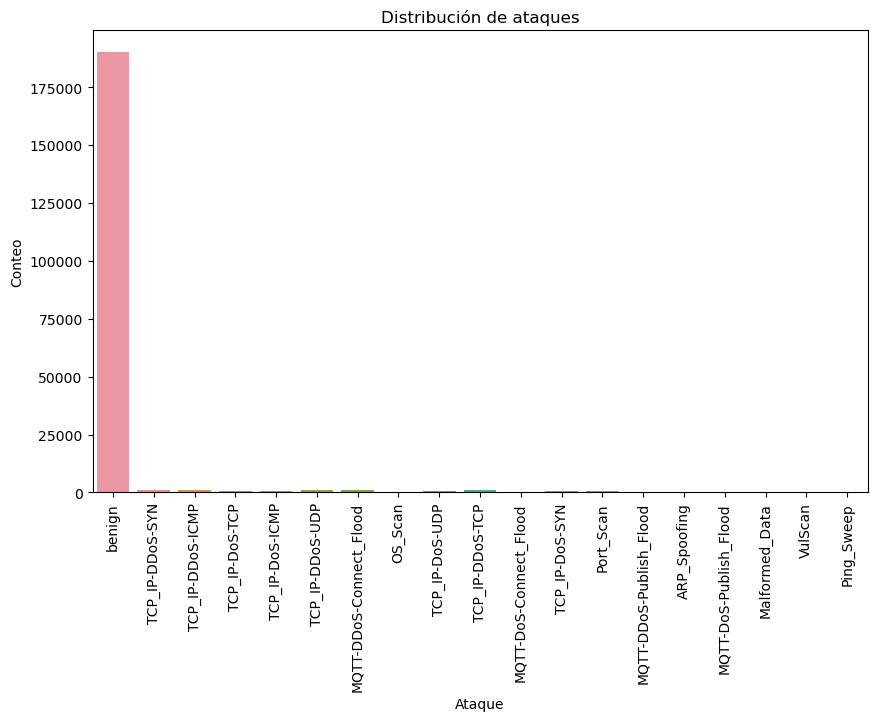

In [11]:
# Crear una figura con subplots
fig, ax = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño de la figura según tus preferencias

# Graficar el conteo de valores en la columna 'ataque'
sns.countplot(x="ataque", data=dataBalanceada, ax=ax)

# Personalizar el gráfico (opcional)
ax.set_title("Distribución de ataques")
ax.set_xlabel("Ataque")
ax.set_ylabel("Conteo")

# Rotar las etiquetas del eje x en vertical
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

In [1]:
f = dataBalanceada['ataque'].value_counts()
fd = pd.DataFrame(f)
suma = fd['count'].sum()

# Crear un diccionario con los valores de porcentaje
porcentajes = {}
for i, elemento in fd['count'].items():
    porcentaje = elemento / suma * 100
    porcentajes[i] = porcentaje

# Crear el DataFrame df a partir del diccionario
df = pd.DataFrame({'Porcentaje': porcentajes})

# Concatenar fd y df
fd2 = pd.concat([fd, df], axis=1)
fd2

NameError: name 'dataBalanceada' is not defined

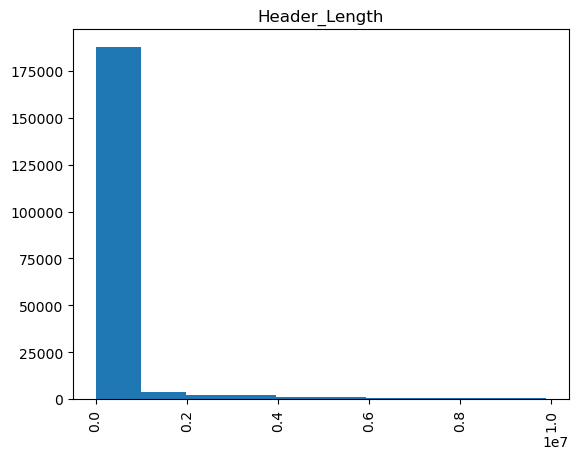

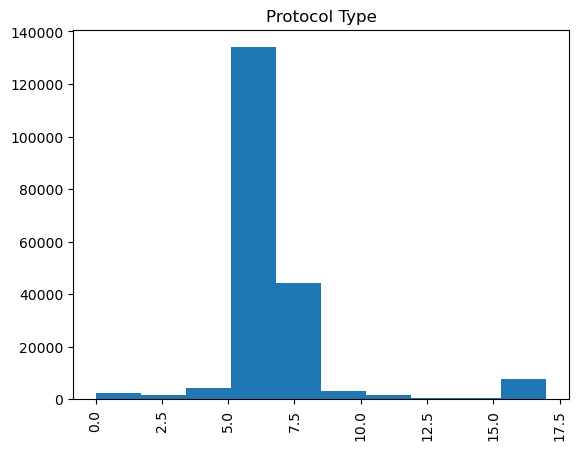

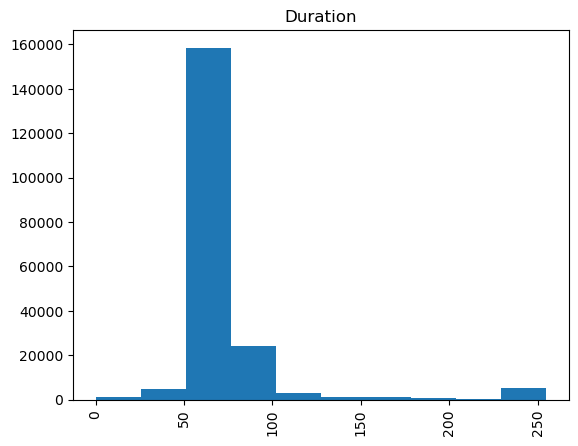

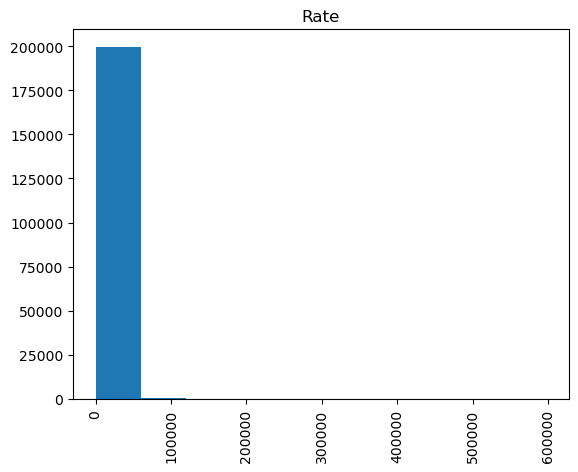

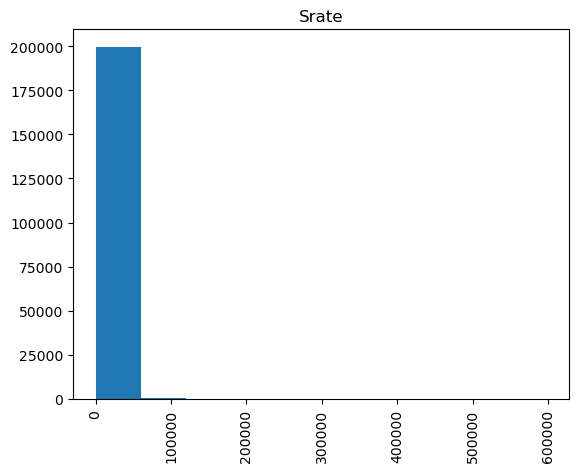

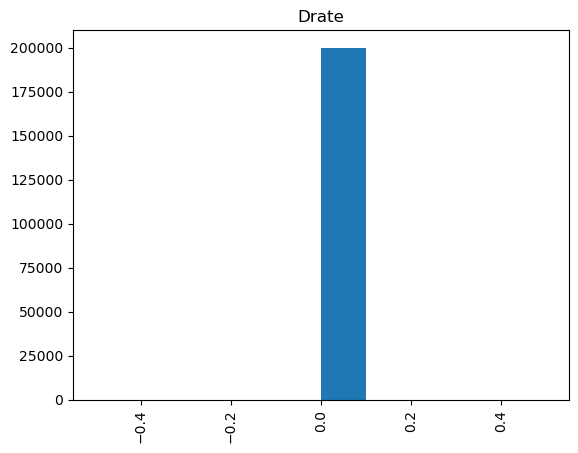

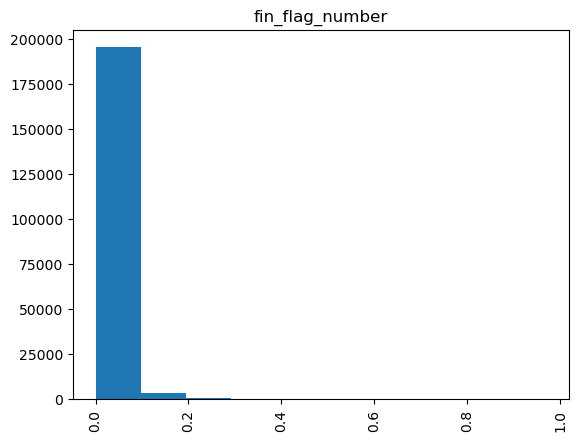

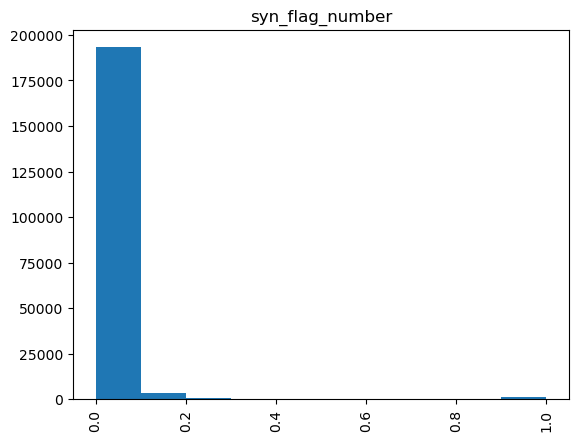

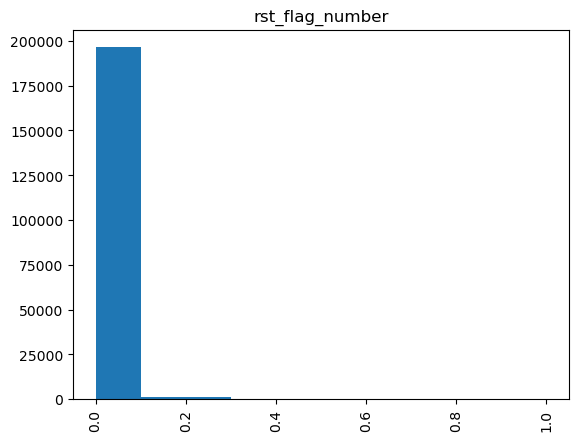

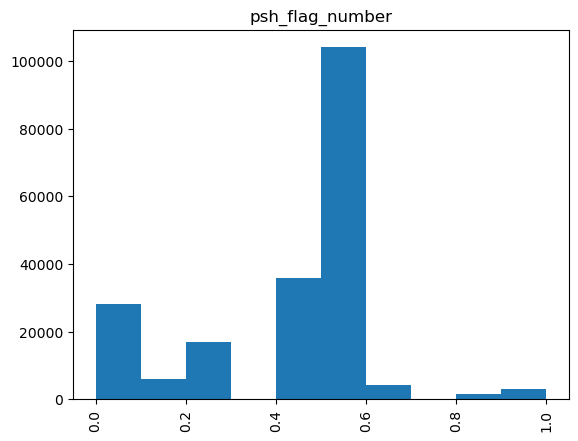

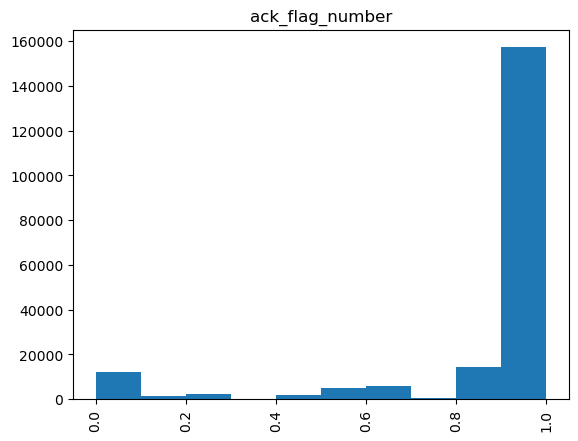

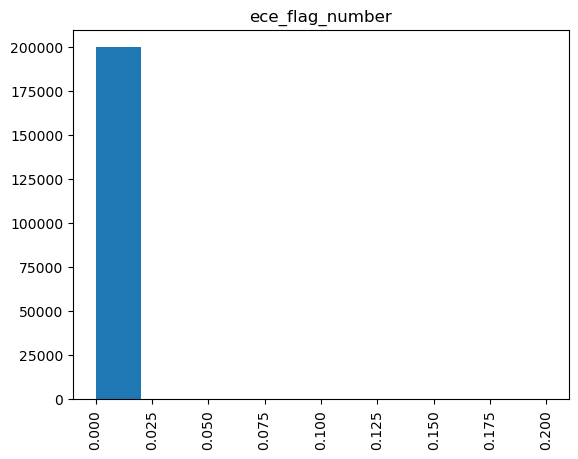

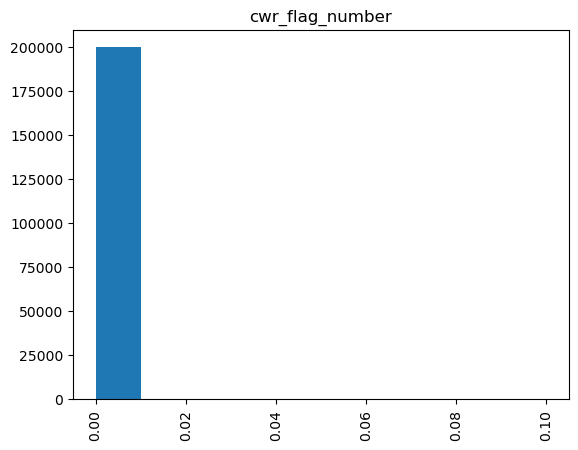

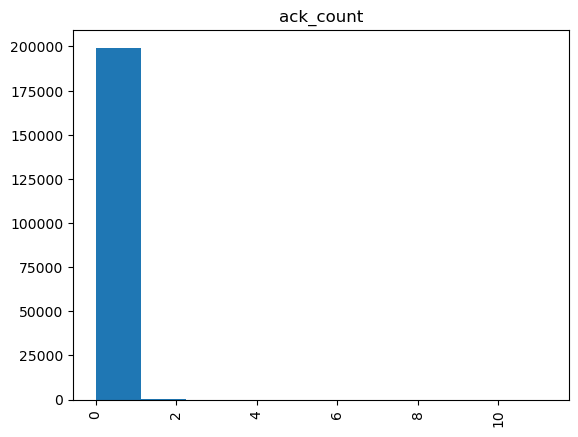

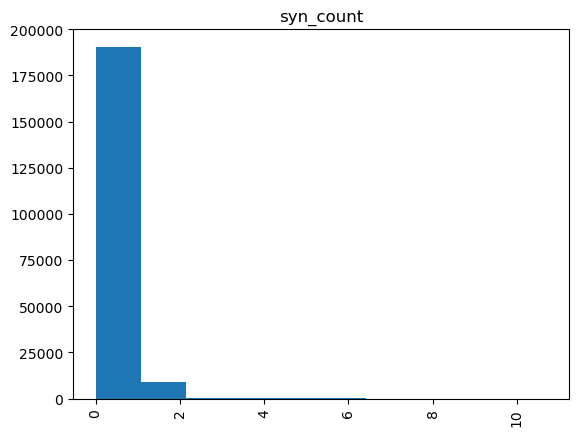

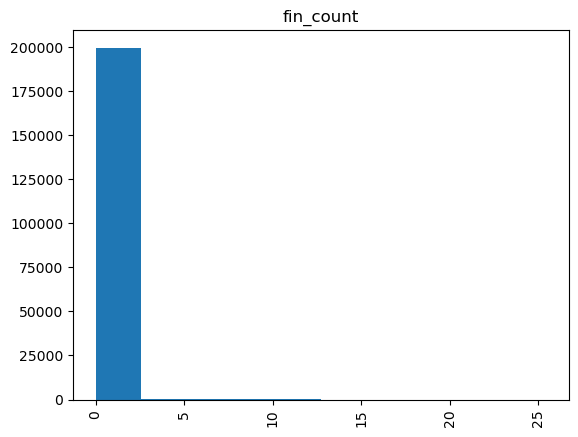

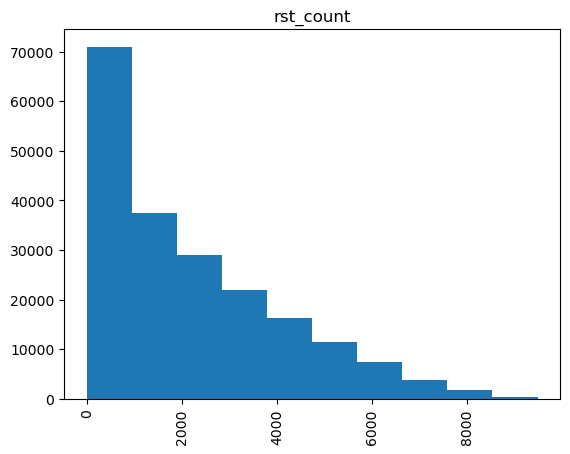

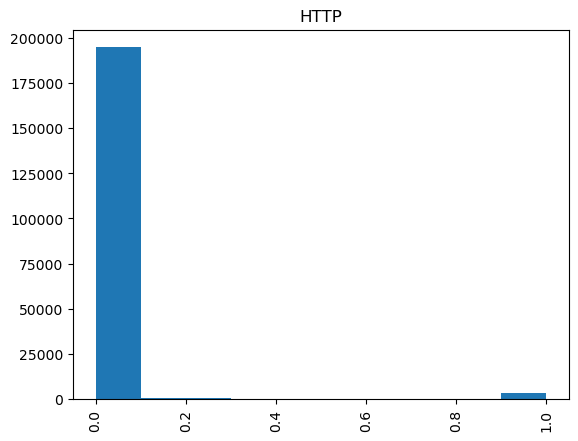

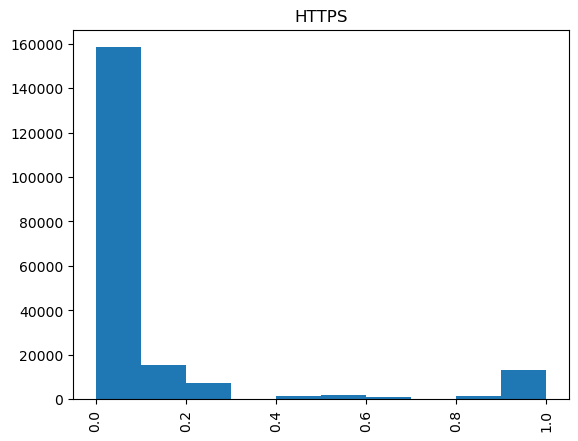

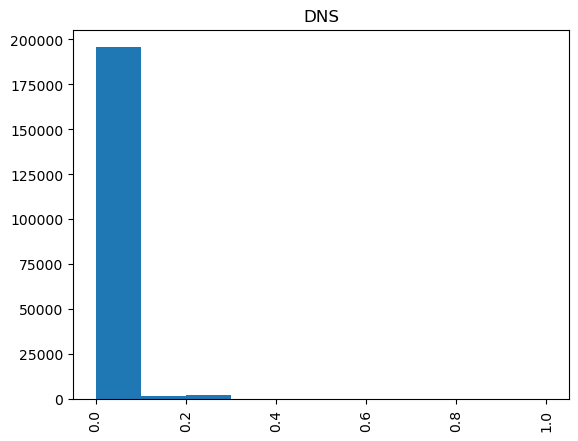

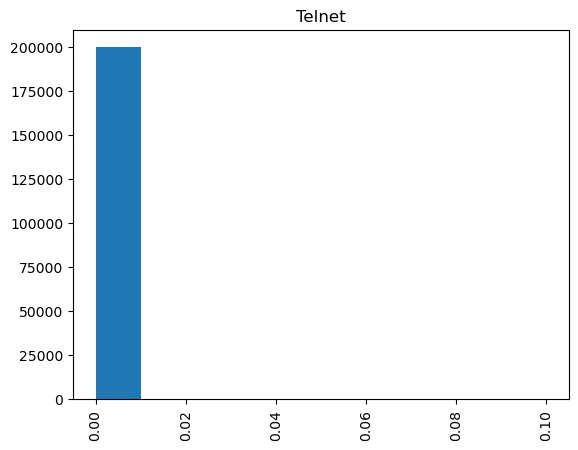

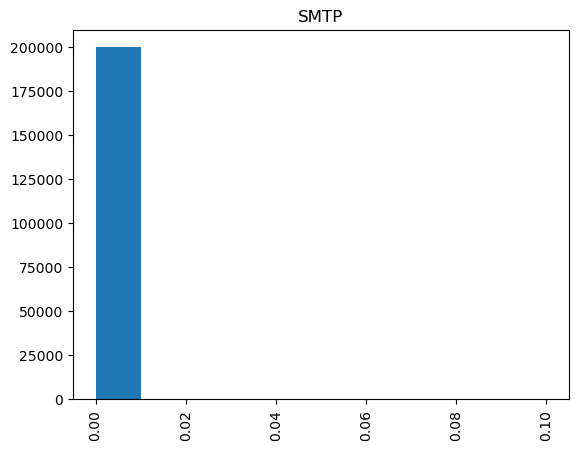

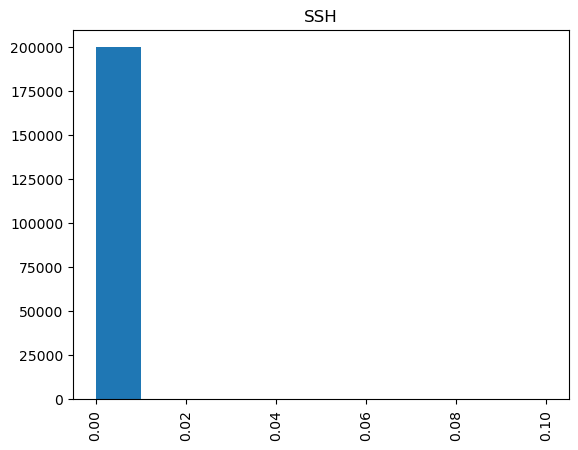

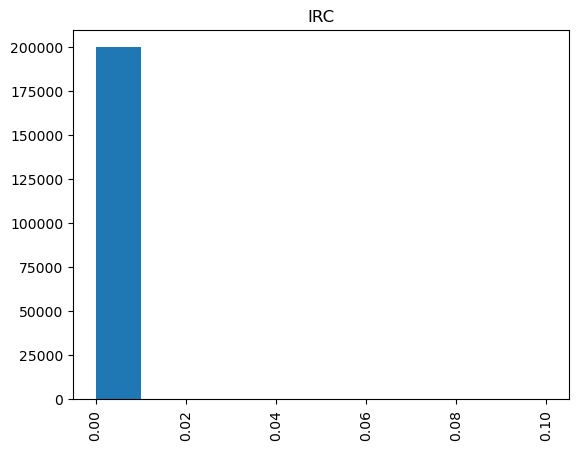

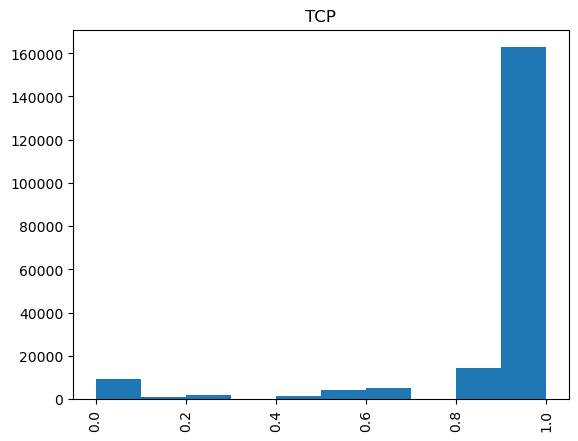

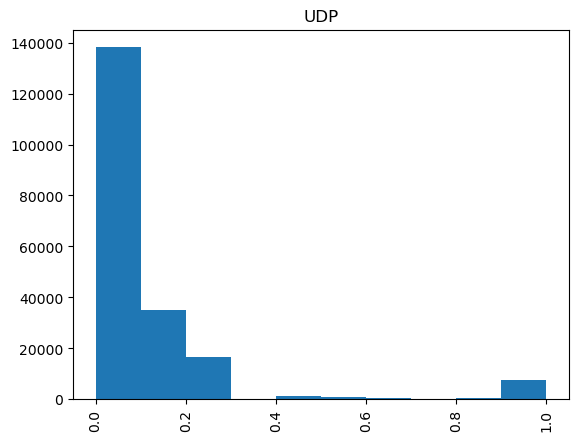

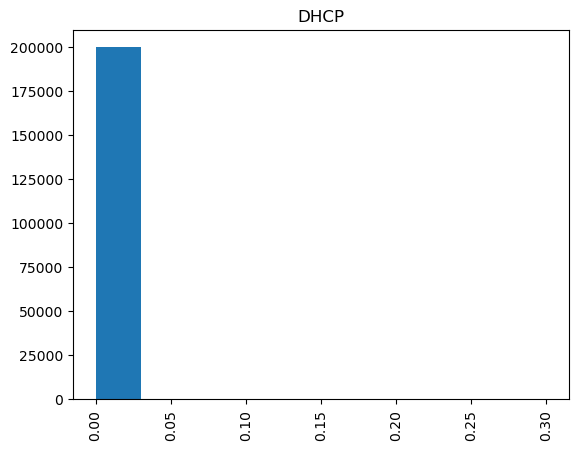

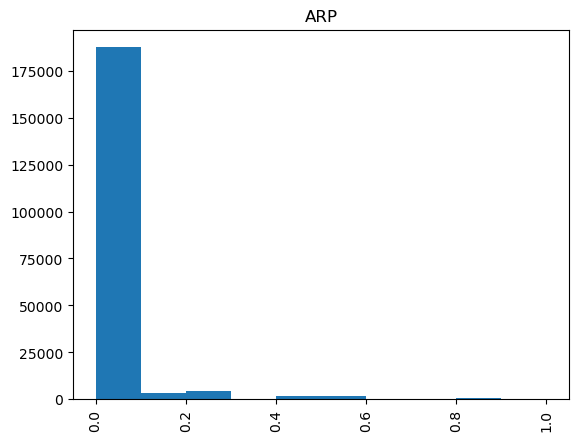

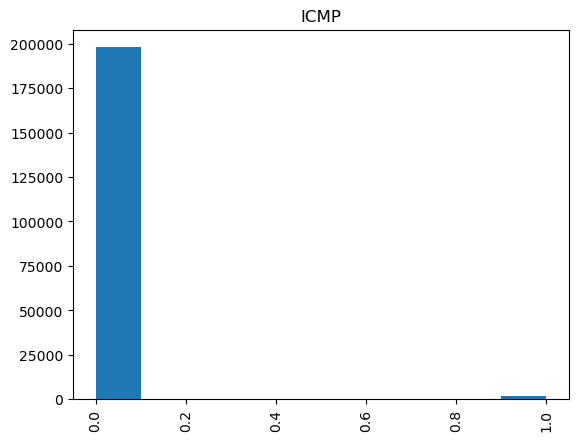

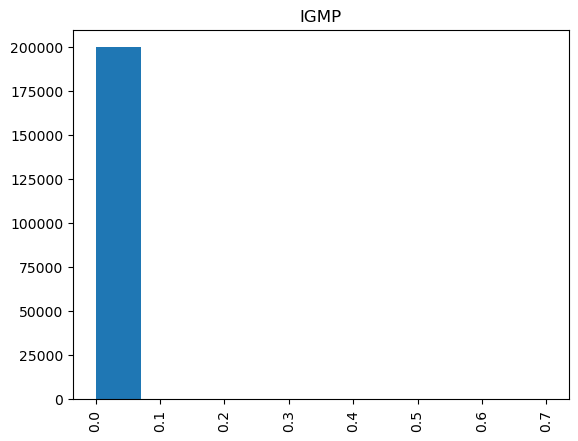

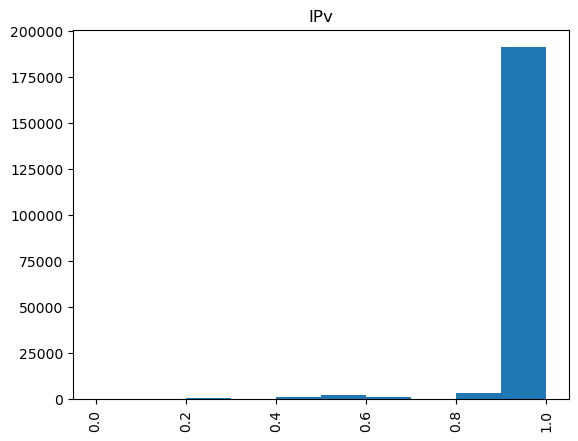

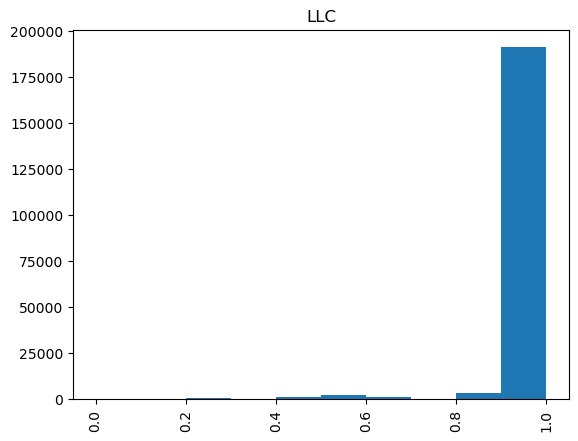

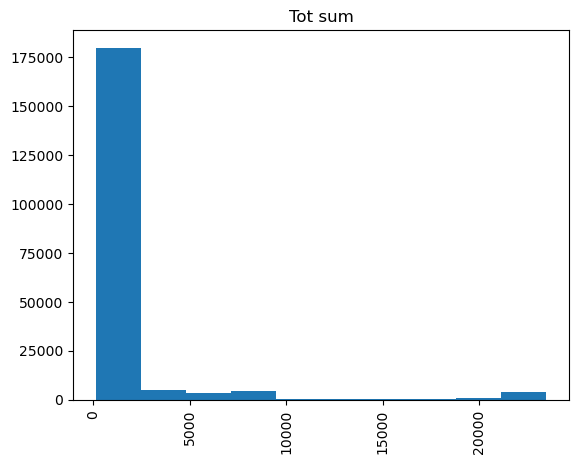

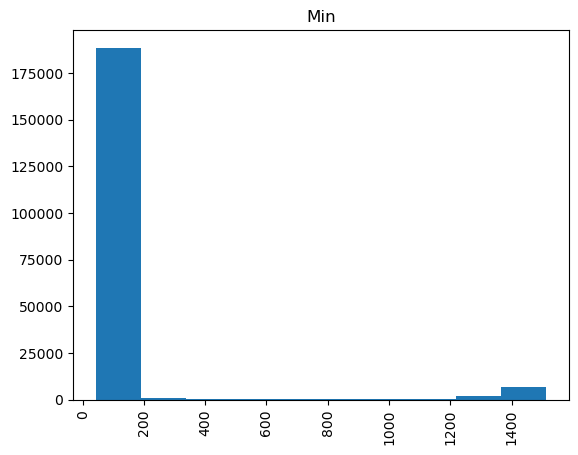

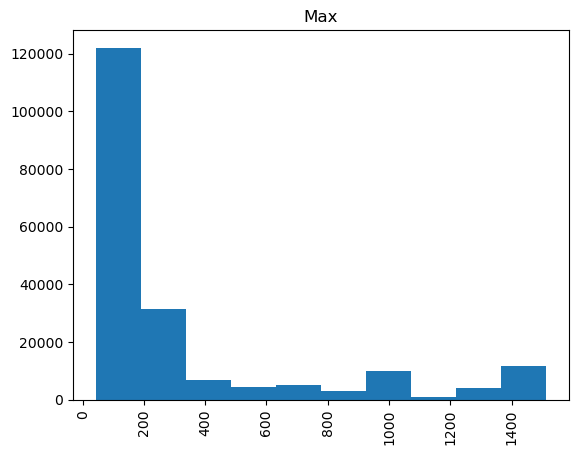

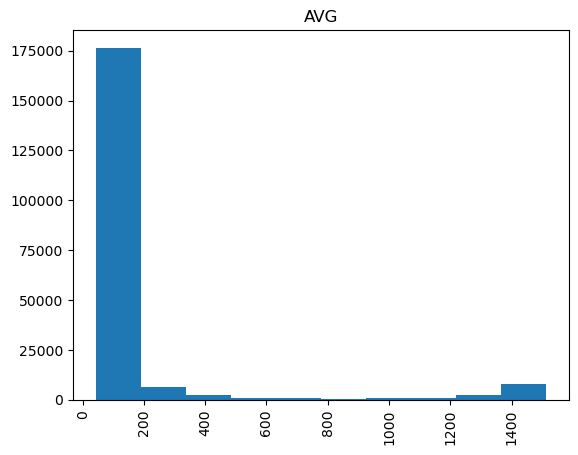

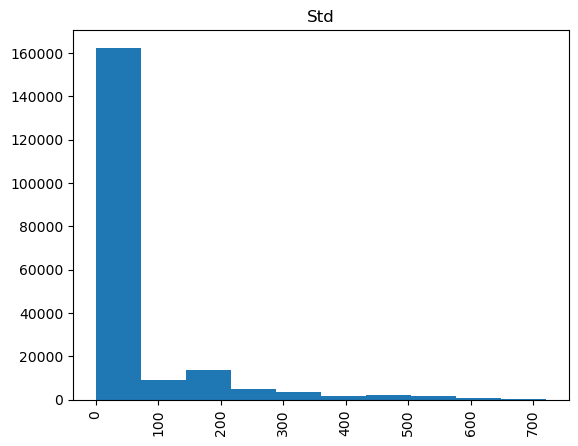

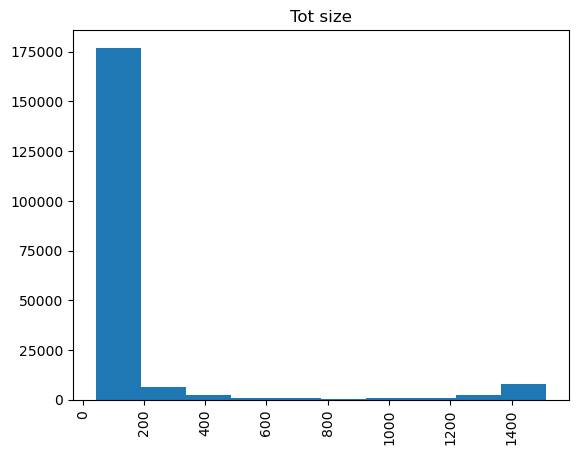

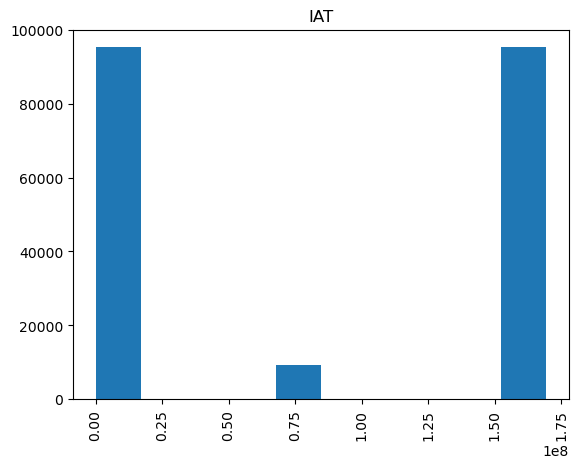

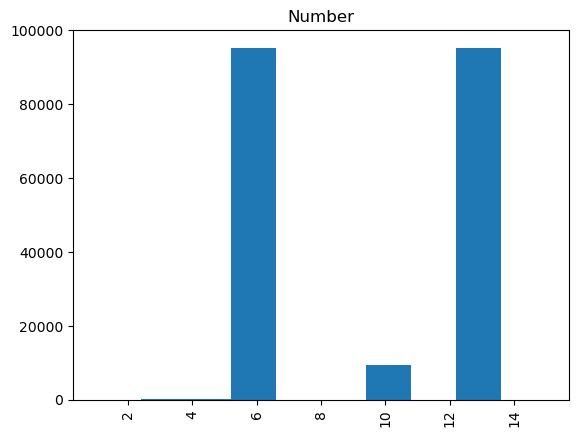

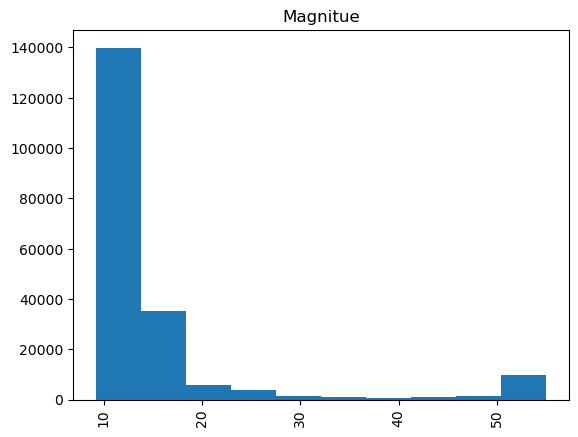

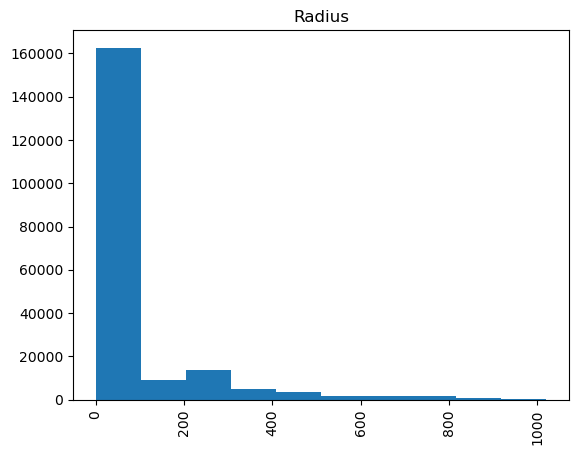

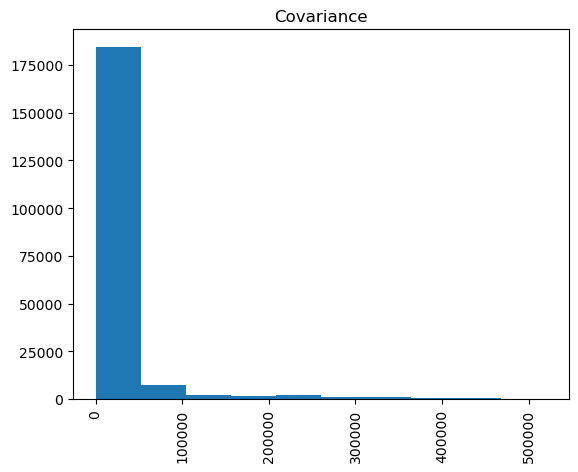

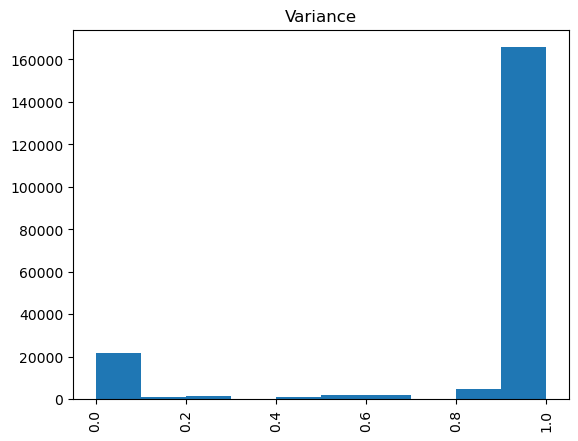

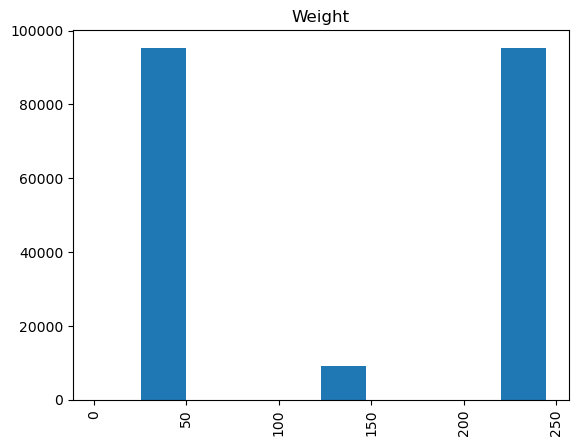

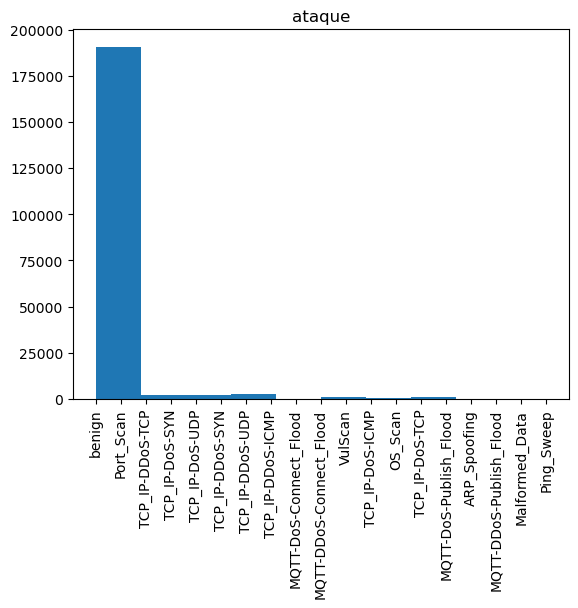

In [11]:
columns=dataBalanceada.columns.values.tolist()
for cate in columns:
    plt.hist(dataBalanceada[cate])
    plt.title(cate)
    plt.xticks(rotation=90)
    plt.show()

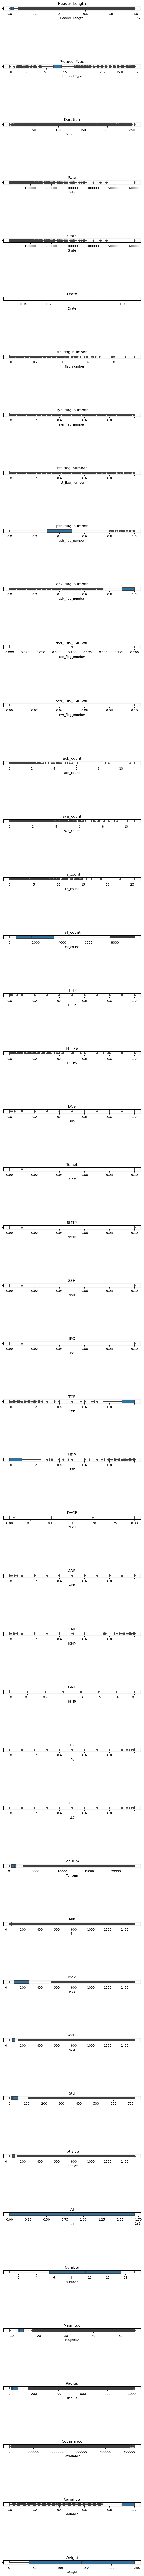

In [12]:
dataX=dataBalanceada.iloc[:,:45]
columnas=dataX.columns.values.tolist()
fig, ax = plt.subplots(nrows=len(columnas), ncols=1, figsize=(8,150))
fig.subplots_adjust(hspace=15)

for i, col in enumerate(columnas):
    sns.boxplot(x=col, data=dataX, ax=ax[i])
    ax[i].set_title(col)

In [12]:
dataX=dataBalanceada.iloc[:,:45]
dataY=dataBalanceada.iloc[:,45]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    dataX, dataY, test_size=0.20, random_state=42)

In [14]:
X_train_norm, X_test_norm = standardizer(X_train, X_test)

In [18]:
y_train

153248       benign
67802        benign
148889       benign
103093       benign
104681    Port_Scan
            ...    
119879       benign
103694       benign
131932       benign
146867       benign
121958       benign
Name: ataque, Length: 160000, dtype: object

In [15]:
y_train=np.where(y_train=='benign',0,1)
y_test=np.where(y_test=='benign',0,1)

## Aplicacion de Isolation Forest

In [48]:
isft = IForest(contamination=0.05, max_samples=40, behaviour='new') 
isft.fit(X_train_norm)

# Training data
y_train_scores = isft.decision_function(X_train_norm)
y_train_pred = isft.predict(X_train_norm)

# Test data
y_test_scores = isft.decision_function(X_test_norm)
y_test_pred = isft.predict(X_test_norm) # outlier labels (0 or 1)


# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , isft.threshold_)

The threshold for the defined contamination rate: 0.0


In [49]:
def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))


The training data: {0: 152020, 1: 7980}
The training data: {0: 38019, 1: 1981}


## Matriz de confusión

In [50]:
threshold = isft.threshold_ 
def confusion_matrix(actual,score, threshold):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': score})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)
confusion_matrix(y_train,y_train_scores,threshold)

Pred,0,1
Actual,,
0,144026,7926
1,7994,54


In [51]:
M=confusion_matrix(y_test,y_test_scores,threshold)

## Metricas 

### Precision

In [110]:
Precision=M.iloc[0,0]/(M.iloc[0,0]+M.iloc[0,1])
print('precisión :',Precision)

precisión : 0.9481181665264928


### Exactitud

In [53]:
Exactitud=(M.iloc[0,0]+M.iloc[1,1])/(M.iloc[0,0]+M.iloc[0,1]+M.iloc[1,0]+M.iloc[1,1])
print('Exactitud :',Exactitud)

Exactitud : 0.902025


### Especificidad (Tasa de verdaderos Negativos)

In [54]:
Especificidad=M.iloc[1,1]/(M.iloc[1,1]+M.iloc[0,1])
print('Especificidad :',Especificidad)

Especificidad : 0.0035335689045936395


### Sensibilidad (Tasa de verdaderos positivos)

In [55]:
TVP=M.iloc[0,0]/(M.iloc[0,0]+M.iloc[1,0])
print('Sensibilidad :',TVP)

Sensibilidad : 0.9488413687892896


### Tasa de falsos negativos

In [56]:
TasaFN=M.iloc[1,0]/(M.iloc[1,0]+M.iloc[0,0])
print('Especificidad :',TasaFN)

Especificidad : 0.05115863121071043


### Tasa de Falsos Positivos

In [57]:
TasaFP=M.iloc[1,0]/(M.iloc[1,0]+M.iloc[1,1])
print('Especificidad :',TasaFP)

Especificidad : 0.9964139344262295


### Valor predictivo Positivo

In [58]:
VPP=M.iloc[0,0]/(M.iloc[0,1]+M.iloc[0,0])
print('Especificidad :',VPP)

Especificidad : 0.9481181665264928


### Valor Predictivo Negativo

In [59]:
VPN=M.iloc[1,1]/(M.iloc[1,1]+M.iloc[1,0])
print('Especificidad :',VPN)

Especificidad : 0.003586065573770492


### F1 SCORE

In [111]:
F1=(2*Precision*TVP)/(Precision+TVP)
print('F1 SCORE:',F1)

F1 SCORE: 0.9484796298000446


## Caracteristicas Mas Importantes

<Axes: >

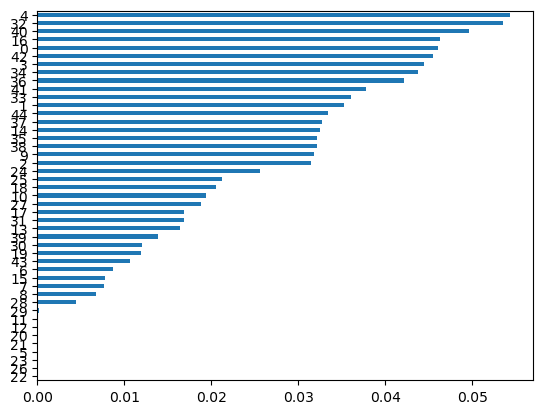

In [60]:
isft_vi = isft.feature_importances_
isft_vi
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X_train.columns, 'y_axis':isft_vi}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh()

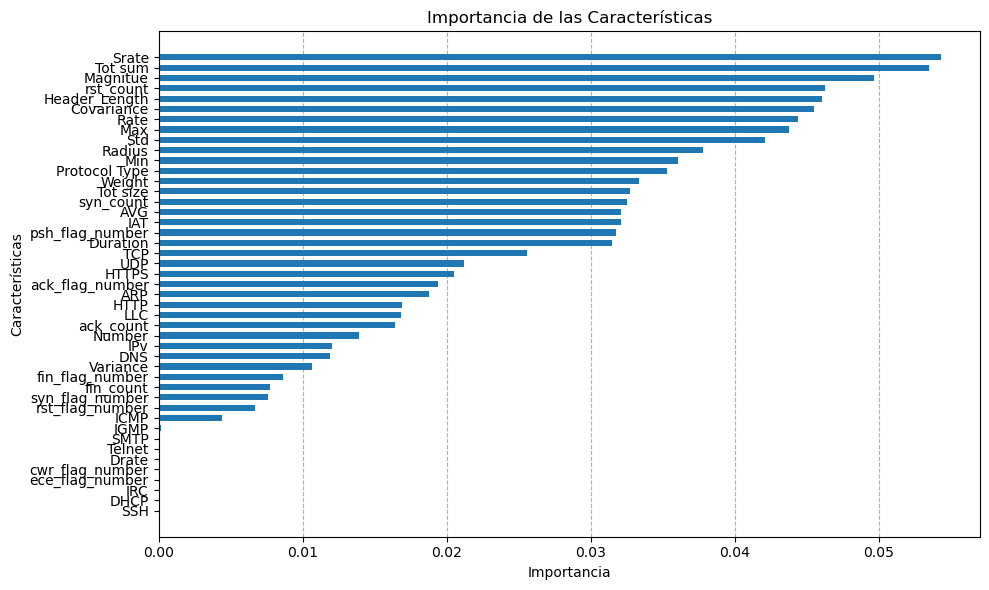

In [61]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X_train), isft.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

for_plot = pd.DataFrame({'x_axis':X_train.columns,
              'y_axis':feature_importances_sorted}).sort_values(by='y_axis',ascending=True)


# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Trazar las barras con un espacio entre ellas
ax.barh(y=for_plot.index, width=for_plot['y_axis'], height=0.6)

# Establecer el título y las etiquetas de los ejes
ax.set_title('Importancia de las Características')
ax.set_xlabel('Importancia')
ax.set_ylabel('Características')

# Agregar una cuadrícula
ax.set_axisbelow(True)
ax.grid(axis='x', linestyle='--', linewidth=0.8)

# Ajustar el espaciado de los ejes y mostrar la gráfica
fig.tight_layout()
plt.show()

In [67]:
feature_importances_sorted

Srate              0.054307
Tot sum            0.053472
Magnitue           0.049632
rst_count          0.046235
Header_Length      0.046046
Covariance         0.045480
Rate               0.044410
Max                0.043733
Std                0.042128
Radius             0.037806
Min                0.036062
Protocol Type      0.035264
Weight             0.033366
Tot size           0.032756
syn_count          0.032521
AVG                0.032126
IAT                0.032111
psh_flag_number    0.031755
Duration           0.031496
TCP                0.025605
UDP                0.021187
HTTPS              0.020505
ack_flag_number    0.019392
ARP                0.018800
HTTP               0.016880
LLC                0.016803
ack_count          0.016422
Number             0.013901
IPv                0.012031
DNS                0.011915
Variance           0.010620
fin_flag_number    0.008675
fin_count          0.007715
syn_flag_number    0.007618
rst_flag_number    0.006685
ICMP               0

### Isolation Forest Con Caracterisiticas

In [16]:
columns=X_train.columns.values.tolist()

In [17]:
X_train_normDF=pd.DataFrame(X_train_norm,columns=columns)

In [18]:
X_test_normDF=pd.DataFrame(X_test_norm,columns=columns)

In [19]:
X_train_features=X_train_normDF[['Rate','Srate','Header_Length','Tot sum','Covariance','ack_flag_number','AVG']] 
X_test_features=X_test_normDF[['Rate','Srate','Header_Length','Tot sum','Covariance','ack_flag_number','AVG']] 

In [68]:
X_train_features=X_train_normDF[['Rate','Srate','Header_Length','Tot sum','Covariance','ack_flag_number','AVG']] 
X_test_features=X_test_normDF[['Rate','Srate','Header_Length','Tot sum','Covariance','ack_flag_number','AVG']] 

In [ ]:
X_train_features=X_train[['Header_Length','Tot size','Tot sum','Covariance','Max','rst_count','AVG','Rate','Protocol Type']]
X_test_features=X_test[['Header_Length','Tot size','Tot sum','Covariance','Max','rst_count','AVG','Rate','Protocol Type']]

In [79]:
isftF = IForest(contamination=0.05, max_samples=40, behaviour='new') 
isftF.fit(X_train_features)

# Training data
y_train_scores_features = isftF.decision_function(X_train_features)
y_train_pred_features = isftF.predict(X_train_features)

# Test data
y_test_scores_features = isftF.decision_function(X_test_features)
y_test_pred_features = isftF.predict(X_test_features) # outlier labels (0 or 1)


# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , isftF.threshold_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


The threshold for the defined contamination rate: 0.0


In [80]:
def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred_features))
print("The training data:", count_stat(y_test_pred_features))

The training data: {0: 152026, 1: 7974}
The training data: {0: 37907, 1: 2093}


model 1 AUC score: 0.7025515189768718


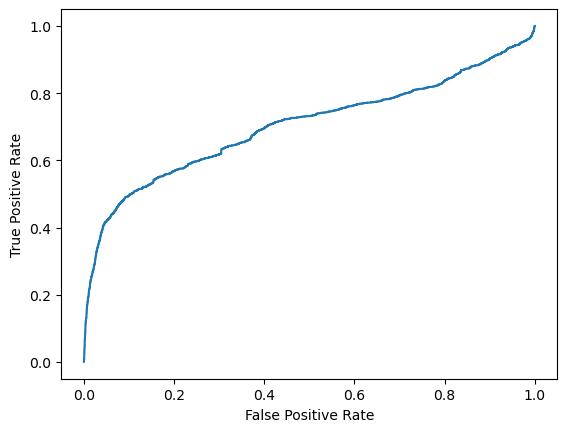

In [81]:
plot_roc_curve(y_test, y_test_by_average)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_test_by_average)}')

## Matriz de confusión

In [71]:
threshold_features = isftF.threshold_ 
def confusion_matrix_features(actual,score, threshold_features):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': score})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold_features,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)
confusion_matrix_features(y_train,y_train_scores_features,threshold_features)

Pred,0,1
Actual,,
0,144429,7523
1,7572,476


In [72]:
MF=confusion_matrix_features(y_train,y_train_scores_features,threshold_features)

## Metricas

### Precision

In [73]:
PrecisionF=MF.iloc[0,0]/(MF.iloc[0,0]+MF.iloc[0,1])
print('precisión :',PrecisionF)

precisión : 0.9504909445087922


### Exactitud

In [74]:
ExactitudF=(MF.iloc[0,0]+MF.iloc[1,1])/(MF.iloc[0,0]+MF.iloc[0,1]+MF.iloc[1,0]+MF.iloc[1,1])
print('Exactitud :',ExactitudF)

Exactitud : 0.90565625


### Especificidad (Tasa de verdaderos Negativos)

In [75]:
EspecificidadF=MF.iloc[1,1]/(MF.iloc[1,1]+MF.iloc[0,1])
print('Especificidad :',EspecificidadF)

Especificidad : 0.05950743842980372


### Sensibilidad (Tasa de verdaderos positivos)

In [76]:
TVPF=MF.iloc[0,0]/(MF.iloc[0,0]+MF.iloc[1,0])
print('Sensibilidad :',TVPF)

Sensibilidad : 0.9501845382596167


### Tasa de falsos negativos

In [77]:
TasaFNF=MF.iloc[1,0]/(MF.iloc[1,0]+MF.iloc[0,0])
print('Especificidad :',TasaFNF)

Especificidad : 0.04981546174038329


### Tasa de Falsos Positivos

In [78]:
TasaFPF=MF.iloc[1,0]/(MF.iloc[1,0]+MF.iloc[1,1])
print('Especificidad :',TasaFPF)

Especificidad : 0.9408548707753479


### Valor predictivo Positivo

In [79]:
VPPF=MF.iloc[0,0]/(MF.iloc[0,1]+MF.iloc[0,0])
print('Especificidad :',VPPF)

Especificidad : 0.9504909445087922


### Valor Predictivo Negativ

In [80]:
VPNF=MF.iloc[1,1]/(MF.iloc[1,1]+MF.iloc[1,0])
print('Especificidad :',VPNF)

Especificidad : 0.059145129224652086


### F1 SCORE

In [112]:
F1F=(2*PrecisionF*TVPF)/(PrecisionF+TVPF)
print('F1 SCORE:',F1F)

F1 SCORE: 0.9503377166864614


# Mejorar El modelo Usando Promedios

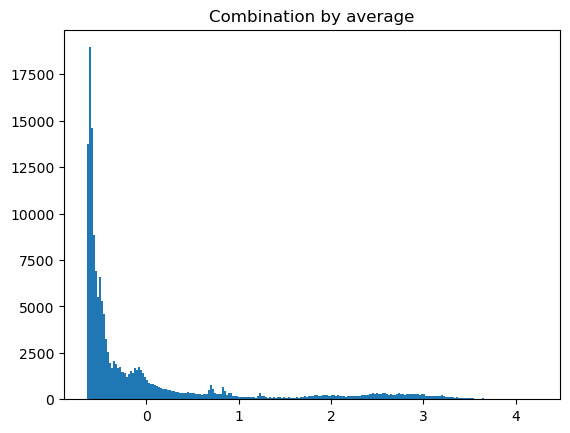

In [66]:
from pyod.models.combination import aom, moa, average, maximization

# Test a range of maximum samples 
##k_list = [20, 30, 40, 50, 60]
k_list = [100, 200, 300, 400, 500]
n_clf = len(k_list)
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train_features.shape[0], n_clf])
test_scores = np.zeros([X_test_features.shape[0], n_clf])

X_train_arreglo=X_train_features.copy().to_numpy()
X_test_arreglo=X_test_features.copy().to_numpy()

# Modeling
for i in range(n_clf):
    k = k_list[i]
    #isft = IForest(contamination=0.05, max_samples=k) 
    isftA = IForest(contamination=0.05, n_estimators=k,random_state=42) 
    isftA.fit(X_train_features)

    

    
    # Store the results in each column:
    train_scores[:, i] = isftA.decision_function(X_train_arreglo) 
    test_scores[:, i] = isftA.decision_function(X_test_arreglo) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

# Combination by average
# The test_scores_norm is 500 x 10. The "average" function will take the average of the 10 columns. The result "y_by_average" is a single column: 
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()


In [67]:
threshold_average = isftA.threshold_ 
def confusion_matrix_average(actual,score, threshold_average):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': score})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold_average,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)
confusion_matrix_average(y_train,y_train_by_average,threshold_average)

Pred,0,1
Actual,,
0,118815,33156
1,587,7442


In [68]:
MA=confusion_matrix_average(y_train,y_train_by_average,threshold_average)

## Metricas

### Precision

In [69]:
PrecisionA=MA.iloc[0,0]/(MA.iloc[0,0]+MA.iloc[0,1])
print('precisión :',PrecisionA)

precisión : 0.7818267959018497


### Exactitud

In [70]:
ExactitudA=(MA.iloc[0,0]+MA.iloc[1,1])/(MA.iloc[0,0]+MA.iloc[0,1]+MA.iloc[1,0]+MA.iloc[1,1])
print('Exactitud :',ExactitudA)

Exactitud : 0.78910625


### Especificidad (Tasa de verdaderos Negativos)

In [71]:
EspecificidadA=MA.iloc[1,1]/(MA.iloc[1,1]+MA.iloc[0,1])
print('Especificidad :',EspecificidadA)

Especificidad : 0.1833095226365831


### Sensibilidad (Tasa de verdaderos positivos)

In [72]:
TVPA=MA.iloc[0,0]/(MA.iloc[0,0]+MA.iloc[1,0])
print('Sensibilidad :',TVPA)

Sensibilidad : 0.9950838344416342


### Tasa de falsos negativos

In [73]:
TasaFNA=MA.iloc[1,0]/(MA.iloc[1,0]+MA.iloc[0,0])
print('Especificidad :',TasaFNA)

Especificidad : 0.004916165558365856


### Tasa de Falsos Positivos

In [74]:
TasaFPA=MA.iloc[1,0]/(MA.iloc[1,0]+MA.iloc[1,1])
print('Especificidad :',TasaFPA)

Especificidad : 0.07310997633578278


### Valor predictivo Positivo

In [75]:
VPPA=MA.iloc[0,0]/(MA.iloc[0,1]+MA.iloc[0,0])
print('Especificidad :',VPPA)

Especificidad : 0.7818267959018497


### Valor predictivo Negativo

In [76]:
VPNA=MA.iloc[1,1]/(MA.iloc[1,1]+MA.iloc[1,0])
print('Especificidad :',VPNA)

Especificidad : 0.9268900236642172


### F1 SCORE

In [1]:
F1A=(2*PrecisionA*TVPA)/(PrecisionA+TVPA)
print('F1 SCORE:',F1A)

NameError: name 'PrecisionA' is not defined

### Curva ROC

In [102]:
Actual_predIF = pd.DataFrame({'Actual': y_test, 'Pred': y_test_by_average })
Actual_predIF['Pred'] = np.where(Actual_predIF['Pred']<=threshold_average,0,1)
actual=Actual_predIF['Actual']
pred=Actual_predIF['Pred']

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(' CURVA ROC')

model 1 AUC score: 0.8515000214995208


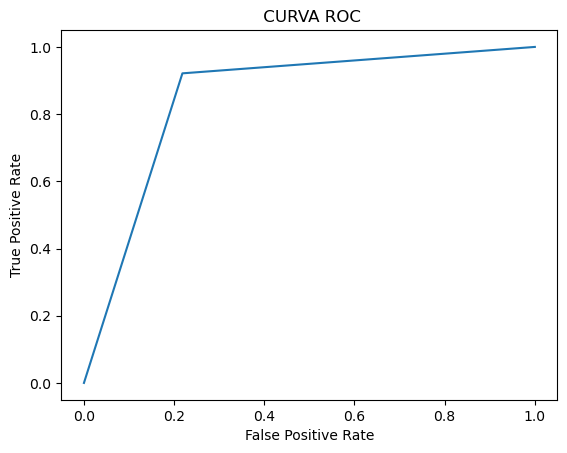

In [103]:
plot_roc_curve(actual, pred)
print(f'model 1 AUC score: {roc_auc_score(actual, pred)}')

In [82]:
Resultados_Metricas=pd.DataFrame({
    'Columnas completas': [Precision, Exactitud, Especificidad,TVP, TasaFN,TasaFP, VPP,VPN,F1],
    'Reducción De columnas': [PrecisionF, ExactitudF, EspecificidadF,TVPF, TasaFNF,TasaFPF, VPPF,VPNF,F1F],
    'Promedio de diferentes estimadores':[PrecisionA, ExactitudA, EspecificidadA,TVPA, TasaFNA,TasaFPA, VPPA,VPNA,F1A]})
Resultados_Metricas.index=['Precision','Exactitud','Tasa De Verdaderos Negativos','Sensibilidad(Tasa de verdaderos positivos)','Tasa de Falsos Negativos',
'Tasa de Falsos Positivos','Valor Predictivo Positivo','Valor Predictivo Negativo','F1 SCORE']


NameError: name 'Precision' is not defined

In [117]:
Resultados_Metricas

,Columnas completas,Reducción De columnas,Promedio de diferentes estimadores
Precision,0.948118,0.950491,0.775179
Exactitud,0.902025,0.905656,0.782156
Tasa De Verdaderos Negativos,0.003534,0.059507,0.177156
Sensibilidad(Tasa de verdaderos positivos),0.948841,0.950185,0.994151
Tasa de Falsos Negativos,0.051159,0.049815,0.005849
Tasa de Falsos Positivos,0.996414,0.940855,0.086108
Valor Predictivo Positivo,0.948118,0.950491,0.775179
Valor Predictivo Negativo,0.003586,0.059145,0.913892
F1 SCORE,0.948480,0.950338,0.871115


In [109]:
joblib.dump(modelo,'mi_modelo_iforest.joblib')

NameError: name 'modelo' is not defined

In [119]:
Resultados_Metricas.to_csv('Metricas Para CICIOMT 5% De Anomalias.csv', index=True)

In [9]:
Metricas=pd.read_csv('Metricas Para CICIOMT 5% De Anomalias.csv')

In [10]:
Metricas

,Unnamed: 0,Columnas completas,Reducción De columnas,Promedio de diferentes estimadores
0,Precision,0.948118,0.950491,0.775179
1,Exactitud,0.902025,0.905656,0.782156
2,Tasa De Verdaderos Negativos,0.003534,0.059507,0.177156
3,Sensibilidad(Tasa de verdaderos positivos),0.948841,0.950185,0.994151
4,Tasa de Falsos Negativos,0.051159,0.049815,0.005849
5,Tasa de Falsos Positivos,0.996414,0.940855,0.086108
6,Valor Predictivo Positivo,0.948118,0.950491,0.775179
7,Valor Predictivo Negativo,0.003586,0.059145,0.913892
8,F1 SCORE,0.948480,0.950338,0.871115


In [13]:
Metricas.rename(columns={'Unnamed: 0': 'Métrica'}, inplace=True)

In [16]:
Metricas[['Métrica','Promedio de diferentes estimadores']]

,Métrica,Promedio de diferentes estimadores
0,Precision,0.775179
1,Exactitud,0.782156
2,Tasa De Verdaderos Negativos,0.177156
3,Sensibilidad(Tasa de verdaderos positivos),0.994151
4,Tasa de Falsos Negativos,0.005849
5,Tasa de Falsos Positivos,0.086108
6,Valor Predictivo Positivo,0.775179
7,Valor Predictivo Negativo,0.913892
8,F1 SCORE,0.871115


## Aplicacion de PCA

In [22]:
# Función de bucle para identificar el número de componentes principales que explican al menos el 85% de la varianza 

from sklearn.decomposition import PCA

for comp in range(2, X_train_features.shape[1]):
    modelC_pca = PCA(n_components= comp)
    modelC_pca.fit(X_train_features)
    comp_checkC = modelC_pca.explained_variance_ratio_
    final_compC = comp
    if comp_checkC.sum() > 0.85:
        break
        
FinalC_PCA = PCA(n_components= final_compC)
FinalC_PCA.fit(X_train_features)
X_train_pca=FinalC_PCA.transform(X_train_features)

num_compsC = comp_checkC.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_compC,comp_checkC.sum()))
#con 3 comp explicacion de la variabilidad del 87% con mormalizado

Using 4 components, we can explain 0.9213848036349928% of the variability in the original data.


In [23]:
#Se convierte el array a dataframe para añadir nombrs a los ejes(x=Componentes, Y=caracteriticas)
pd.DataFrame(modelC_pca.components_,columns=X_train_features.columns,index = [f'PC-{i+1}' for i in range(final_compC)]).T

,PC-1,PC-2,PC-3,PC-4
Rate,0.122066,0.672076,0.126872,0.131548
Srate,0.122066,0.672076,0.126872,0.131548
Header_Length,0.482287,-0.109263,0.278652,-0.180103
Tot sum,0.561877,-0.113464,0.078747,-0.005393
Covariance,0.261553,-0.057308,-0.653644,0.674584
ack_flag_number,-0.138756,-0.236087,0.669263,0.690138
AVG,0.578126,-0.113116,0.093781,-0.039614


----------------------------------------------------
Percentage of variance explanation by each component
----------------------------------------------------
[0.36787427 0.29459663 0.14108901 0.1178249 ]


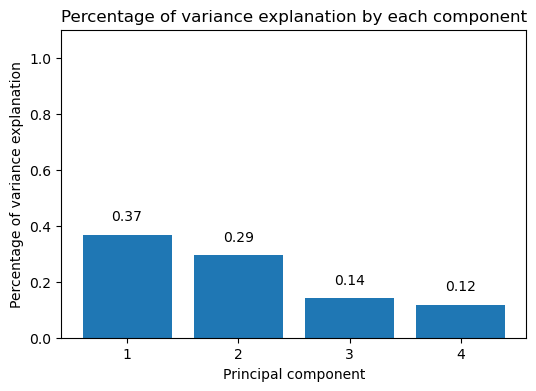

In [24]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Percentage of variance explanation by each component')
print('----------------------------------------------------')
print(modelC_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelC_pca.n_components_) + 1,
    height = modelC_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X_train_features.columns)) + 1, modelC_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelC_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentage of variance explanation by each component')
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage of variance explanation');

In [25]:
#Visualizacion

X_train_pca_df = pd.DataFrame(X_train_pca,index=X_train_features.index)
X_train_pca_df

X_test_pca=FinalC_PCA.transform(X_test_features)
X_test_pca_df = pd.DataFrame(X_test_pca,index=X_test_features.index)
X_train_pca_df

,0,1,2,3
0,-0.452926,0.434990,-1.167371,-1.388079
1,-0.721755,-0.111250,0.368536,0.173183
2,-0.534786,-0.150844,0.429007,0.142783
3,-0.317730,0.808323,-2.204675,-2.421136
4,2.494454,-0.575957,-3.738420,3.553268
...,...,...,...,...
159995,-0.483370,-0.158884,0.378488,0.195286
159996,-0.567373,-0.145928,0.452962,0.119196
159997,-0.428864,-0.173551,0.443971,0.144513
159998,-0.625650,-0.030434,0.084104,-0.054249


In [161]:
from pyod.models.lof import LOF
lof = LOF(contamination=0.05) 
lof.fit(X_train_pca)

# Training data
y_train_scores = lof.decision_function(X_train_pca)
y_train_pred = lof.predict(X_train_pca)

# Test data
y_test_scores = lof.decision_function(X_test_pca)
y_test_pred = lof.predict(X_test_pca) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , lof.threshold_)

The training data: {0: 152808, 1: 7192}
The training data: {0: 37942, 1: 2058}
The threshold for the defined contamination rate: 1.3442893420914785


In [162]:
y_train_scores.shape

(160000,)

In [163]:
threshold = lof.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train_pca,y_train_scores, threshold)

,Group,Count,Count %,0,1,2,3,Anomaly_Score
0,Normal,152808,95.505,-0.02,-0.01,0.02,0.00,1.03
1,Outlier,7192,4.495,0.32,0.20,-0.37,-0.02,13569.18


In [165]:
def confusion_matrix_threshold(
    actual,score, threshold):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': score})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)
confusion_matrix_threshold(y_test, y_test_scores, lof.threshold_)

Pred,0,1
Actual,,
0,36299,1722
1,1643,336


In [166]:
MLOF=confusion_matrix_threshold(y_test, y_test_scores, lof.threshold_)

In [167]:
def Metricas_precision(Matriz):
    Precision=Matriz.iloc[0,0]/(Matriz.iloc[0,0]+Matriz.iloc[0,1])
    Exactitud=(Matriz.iloc[0,0]+Matriz.iloc[1,1])/(Matriz.iloc[0,0]+Matriz.iloc[0,1]+Matriz.iloc[1,0]+Matriz.iloc[1,1])
    Especificidad=Matriz.iloc[1,1]/(Matriz.iloc[1,1]+Matriz.iloc[0,1])
    TVP=Matriz.iloc[0,0]/(Matriz.iloc[0,0]+Matriz.iloc[1,0])
    TasaFN=Matriz.iloc[1,0]/(Matriz.iloc[1,0]+Matriz.iloc[0,0])
    TasaFP=Matriz.iloc[1,0]/(Matriz.iloc[1,0]+Matriz.iloc[1,1])
    VPP=Matriz.iloc[0,0]/(Matriz.iloc[0,1]+Matriz.iloc[0,0])
    VPN=Matriz.iloc[1,1]/(Matriz.iloc[1,1]+Matriz.iloc[1,0])
    F1=(2*Precision*TVP)/(Precision+TVP)
    return Precision,Exactitud, Especificidad,TVP,TasaFN,TasaFP,VPP,VPN,F1

In [168]:
PrecisionLOF,ExactitudLOF, EspecificidadLOF,TVPLOF,TasaFNLOF,TasaFPLOF,VPPLOF,VPNLOF,F1LOF=Metricas_precision(MLOF)

In [169]:
Resultados_Metricas_LOF=pd.DataFrame({
    'Columnas completas': [PrecisionLOF,ExactitudLOF, EspecificidadLOF,TVPLOF,TasaFNLOF,TasaFPLOF,VPPLOF,VPNLOF,F1LOF]})
Resultados_Metricas_LOF.index=['Precision','Exactitud','Tasa De Verdaderos Negativos','Sensibilidad(Tasa de verdaderos positivos)','Tasa de Falsos Negativos',
'Tasa de Falsos Positivos','Valor Predictivo Positivo','Valor Predictivo Negativo','F1 SCORE']


In [170]:
Resultados_Metricas_LOF

,Columnas completas
Precision,0.954709
Exactitud,0.915875
Tasa De Verdaderos Negativos,0.163265
Sensibilidad(Tasa de verdaderos positivos),0.956697
Tasa de Falsos Negativos,0.043303
Tasa de Falsos Positivos,0.830217
Valor Predictivo Positivo,0.954709
Valor Predictivo Negativo,0.169783
F1 SCORE,0.955702


In [171]:
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.562245979087725


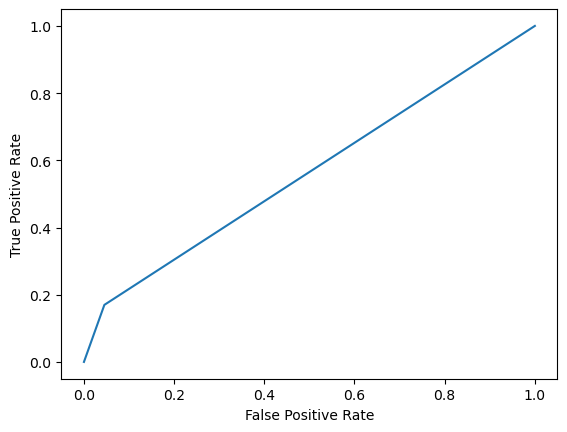

In [172]:
plot_roc_curve(y_test, y_test_pred)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_test_pred)}')

In [96]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

## Averages

In [73]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.models.lof import LOF
# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)
# Test a range of k-neighbors from 10 to 200. There will be 20 models.
n_clf = 20
k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 
 120, 130, 140, 150, 160, 170, 180, 190, 200]
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train_pca.shape[0], n_clf])
test_scores = np.zeros([X_test_pca.shape[0], n_clf])
train_scores.shape
# Modeling
for i in range(n_clf):
    k = k_list[i]
    lof = LOF(n_neighbors=k) 
    lof.fit(X_train_pca)

    # Store the results in each column:
    train_scores[:, i] = lof.decision_scores_
    test_scores[:, i] = lof.decision_function(X_test_pca) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [175]:
loft=lof.threshold_
loft

1.3442893420914785

In [97]:
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)

In [96]:
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('LOF outlier score')
plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x00000207971456C0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x000002079D22E340> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [173]:
descriptive_stat_threshold(X_test,y_test_by_average_lof, loft)

NameError: name 'y_test_by_average_lof' is not defined

In [176]:
confusion_matrix_threshold(y_test, y_test_by_average, 0.000009)

Pred,0,1
Actual,,
0,32158,5863
1,1186,793


In [177]:
MLOFME=confusion_matrix_threshold(y_test, y_test_by_average, 0.000009)
PrecisionLOFM,ExactitudLOFM, EspecificidadLOFM,TVPLOFM,TasaFNLOFM,TasaFPLOFM,VPPLOFM,VPNLOFM,F1LOFM=Metricas_precision(MLOFME)

In [178]:
Resultados_Metricas_LOFM=pd.DataFrame({
    'Columnas completas': [PrecisionLOFM,ExactitudLOFM, EspecificidadLOFM,TVPLOFM,TasaFNLOFM,TasaFPLOFM,VPPLOFM,VPNLOFM,F1LOFM]})
Resultados_Metricas_LOFM.index=['Precision','Exactitud','Tasa De Verdaderos Negativos','Sensibilidad(Tasa de verdaderos positivos)','Tasa de Falsos Negativos',
'Tasa de Falsos Positivos','Valor Predictivo Positivo','Valor Predictivo Negativo','F1 SCORE']


In [179]:
Resultados_Metricas_LOFM

,Columnas completas
Precision,0.845796
Exactitud,0.823775
Tasa De Verdaderos Negativos,0.119141
Sensibilidad(Tasa de verdaderos positivos),0.964431
Tasa de Falsos Negativos,0.035569
Tasa de Falsos Positivos,0.599293
Valor Predictivo Positivo,0.845796
Valor Predictivo Negativo,0.400707
F1 SCORE,0.901226


In [186]:
Actual_predLOF = pd.DataFrame({'Actual': y_test, 'Pred': y_test_by_average })
Actual_predLOF['Pred'] = np.where(Actual_predLOF['Pred']<=0.00009,0,1)
actualLOF=Actual_predLOF['Actual']
predLOF=Actual_predLOF['Pred']

model 1 AUC score: 0.6232910381073282


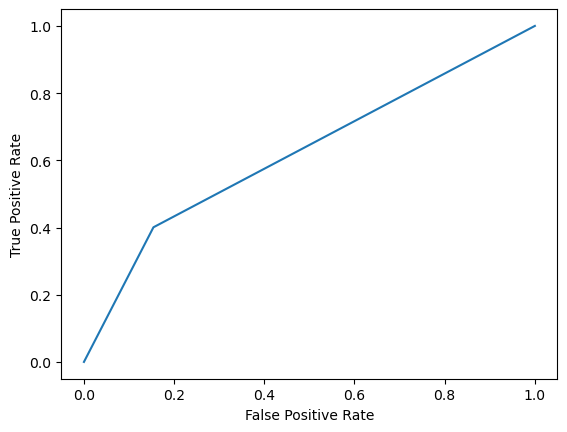

In [187]:
plot_roc_curve(actualLOF, predLOF)
print(f'model 1 AUC score: {roc_auc_score(actualLOF, predLOF)}')

# CBLOF

In [20]:
def confusion_matrix(actual,pred):
    Actual_pred = pd.DataFrame({'Actual': actual,'Pred': pred})
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)


In [21]:
def confusion_matrix_threshold(
    actual,score, threshold):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': score})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)

In [57]:
from pyod.models.cblof import CBLOF
cblof = CBLOF(n_clusters=10, contamination = 0.05) 
cblof.fit(X_train_pca)

# Training data
y_train_scores_cblof = cblof.decision_function(X_train_pca)
y_train_pred_cblof = cblof.predict(X_train_pca)

# Test data
y_test_scores_cblof = cblof.decision_function(X_test_pca)
y_test_pred_cblof = cblof.predict(X_test_pca) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred_cblof))
print("The training data:", count_stat(y_test_pred_cblof))
# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , cblof.threshold_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The training data: {0: 152000, 1: 8000}
The training data: {0: 37942, 1: 2058}
The threshold for the defined contamination rate: 1.6404006357685716


In [58]:
mcblof=confusion_matrix_threshold(y_test, y_test_scores_cblof, cblof.threshold_)
mcblof

Pred,0,1
Actual,,
0,36167,1854
1,1775,204


In [59]:
PrecisionCBLOF,ExactitudCBLOF, EspecificidadCBLOF,TVPCBLOF,TasaFNCBLOF,TasaFPCBLOF,VPPCBLOF,VPNCBLOF,F1CBLOF=Metricas_precision(mcblof)

In [60]:
Resultados_Metricas_CBLOF=pd.DataFrame({
    'Columnas completas': [PrecisionCBLOF,ExactitudCBLOF, EspecificidadCBLOF,TVPCBLOF,TasaFNCBLOF,TasaFPCBLOF,VPPCBLOF,VPNCBLOF,F1CBLOF]})
Resultados_Metricas_CBLOF.index=['Precision','Exactitud','Tasa De Verdaderos Negativos','Sensibilidad(Tasa de verdaderos positivos)','Tasa de Falsos Negativos',
'Tasa de Falsos Positivos','Valor Predictivo Positivo','Valor Predictivo Negativo','F1 SCORE']


In [61]:
Resultados_Metricas_CBLOF

,Columnas completas
Precision,0.951237
Exactitud,0.909275
Tasa De Verdaderos Negativos,0.099125
Sensibilidad(Tasa de verdaderos positivos),0.953218
Tasa de Falsos Negativos,0.046782
Tasa de Falsos Positivos,0.896918
Valor Predictivo Positivo,0.951237
Valor Predictivo Negativo,0.103082
F1 SCORE,0.952227


In [62]:
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.5271599194291169


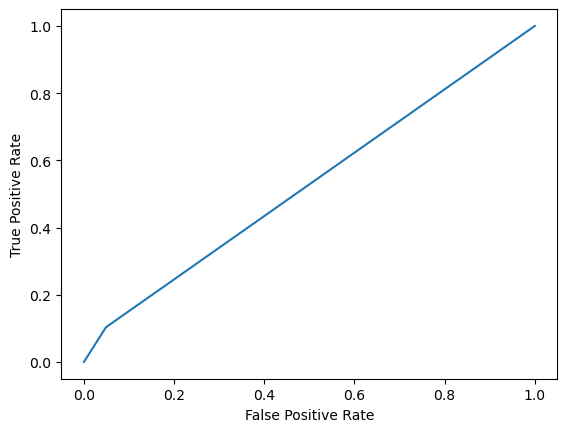

In [63]:
plot_roc_curve(y_test, y_test_pred_cblof)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_test_pred_cblof)}')

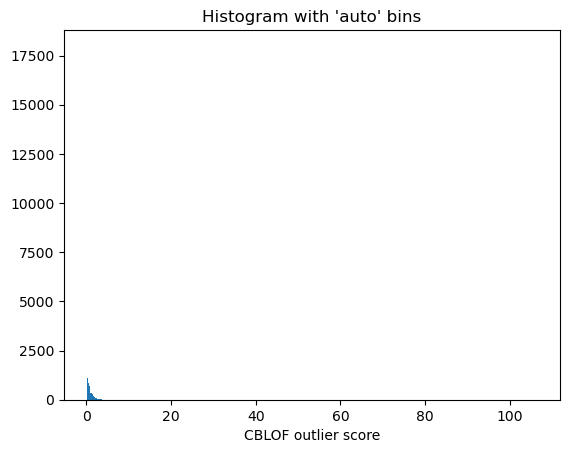

In [45]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores_cblof, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('CBLOF outlier score')
plt.show()

## Averages

In [150]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.models.cblof import CBLOF

# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)
# Test a range of clusters from 10 to 50. There will be 5 models.
n_clf = 5
k_list = [10, 20, 30, 40, 50]
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train_pca.shape[0], n_clf])
test_scores = np.zeros([X_test_pca.shape[0], n_clf])
train_scores.shape
# Crear un arreglo vacío
thresholdm = []

for i in range(n_clf):
    k = k_list[i]
    cblof = CBLOF(n_clusters = k, contamination=0.05)  
    cblof.fit(X_train_pca)
    thresholdm.append(cblof.threshold_)

    # Store the results in each column:
    train_scores[:, i] = cblof.decision_function(X_train_pca) 
    test_scores[:, i] = cblof.decision_function(X_test_pca) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)
promediothreshold=np.mean(thresholdm)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

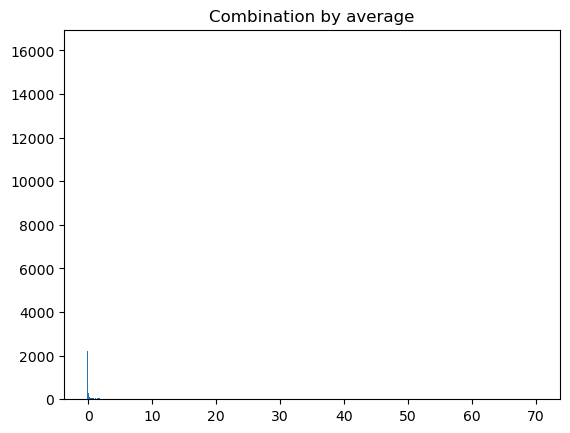

In [151]:
# Combination by average
# The test_scores_norm is 500 x 5. The "average" function will take the average of the 5 columns. The result "y_by_average" is a single column: 
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [152]:
promediothreshold

2.7889161526276203

In [154]:
mcblofm=confusion_matrix_threshold(y_test, y_test_by_average, promediothreshold)
mcblofm

Pred,0,1
Actual,,
0,37782,239
1,1858,121


In [155]:
PrecisionCBLOFM,ExactitudCBLOFM, EspecificidadCBLOFM,TVPCBLOFM,TasaFNCBLOFM,TasaFPCBLOFM,VPPCBLOFM,VPNCBLOFM,F1CBLOFM=Metricas_precision(mcblofm)

In [156]:
Resultados_Metricas_CBLOFM=pd.DataFrame({
    'Columnas completas': [PrecisionCBLOFM,ExactitudCBLOFM, EspecificidadCBLOFM,TVPCBLOFM,TasaFNCBLOFM,TasaFPCBLOFM,VPPCBLOFM,VPNCBLOFM,F1CBLOFM]})
Resultados_Metricas_CBLOFM.index=['Precision','Exactitud','Tasa De Verdaderos Negativos','Sensibilidad(Tasa de verdaderos positivos)','Tasa de Falsos Negativos',
'Tasa de Falsos Positivos','Valor Predictivo Positivo','Valor Predictivo Negativo','F1 SCORE']


In [157]:
Resultados_Metricas_CBLOFM

,Columnas completas
Precision,0.993714
Exactitud,0.947575
Tasa De Verdaderos Negativos,0.336111
Sensibilidad(Tasa de verdaderos positivos),0.953128
Tasa de Falsos Negativos,0.046872
Tasa de Falsos Positivos,0.938858
Valor Predictivo Positivo,0.993714
Valor Predictivo Negativo,0.061142
F1 SCORE,0.972998


In [158]:
Actual_predIF = pd.DataFrame({'Actual': y_test, 'Pred': y_test_by_average })
Actual_predIF['Pred'] = np.where(Actual_predIF['Pred']<=cblof.threshold_,0,1)
actual=Actual_predIF['Actual']
pred=Actual_predIF['Pred']
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.5276308368135537


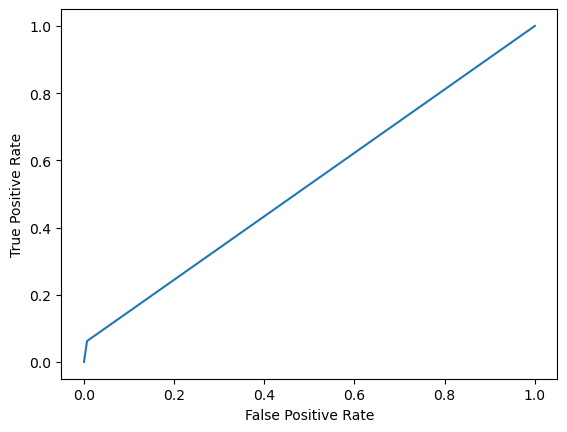

In [159]:
plot_roc_curve(actual, pred)
print(f'model 1 AUC score: {roc_auc_score(actual, pred)}')